<a href="https://colab.research.google.com/github/N-HEDGER/PYM0FM_NH/blob/master/scripts/GLM_examp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome!

In this demonstration, we will be fitting a simple GLM to some data.

Here is what we will be doing.

1. We will be taking data that was collected during movie-watching.
2. We will be recording events 

Here we start by installing a few packages that we need. This will generate quite a bit of output, but you can ignore this. When it has finished you will see a green tick 

In [1]:
#@title Run this cell
# this cell installs some dependencies. 
# feel free to disregard the output this generates

!apt -qq install inkscape > /dev/null
!pip -qq install nibabel nilearn
!pip -qq install git+https://github.com/gallantlab/pycortex.git#egg=pycortex



Extracting templates from packages: 100%
     |████████████████████████████████| 9.6 MB 4.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [2]:
import numpy as np
import scipy as sp
import nibabel as nb
import nilearn as nl
from nilearn.surface import load_surf_data
import os, shutil, urllib.request

from matplotlib import rc
from matplotlib import cm
import matplotlib as mpl
rc('animation', html='jshtml')

import matplotlib.pyplot as plt
%matplotlib inline 

import pickle

In [3]:
#
# this cell ensures that we can work with our own surface from within the colab environment
#
wrong_filestore_location='/usr/share/pycortex/db'

os.makedirs('/content/pycortex/db', exist_ok=True)
os.makedirs('/content/pycortex/colormaps', exist_ok=True)
os.makedirs('/content/data', exist_ok=True)

with open('/usr/local/lib/python3.7/dist-packages/cortex/defaults.cfg', 'r') as f:
  file_source = f.read()

replace_string = file_source.replace(wrong_filestore_location, '/content/pycortex/db') #save output 
with open('/usr/local/lib/python3.7/dist-packages/cortex/defaults.cfg', 'w') as f:
  f.write(replace_string)   

os.chdir('/tmp/')
!git clone https://github.com/gallantlab/pycortex.git
!cp /tmp/pycortex/filestore/colormaps/* /content/pycortex/colormaps/

#
# and we'll download our average hcp subject for pycortex visualization
#

pycortex_sj_URL = "https://ndownloader.figshare.com/files/25768841"

urllib.request.urlretrieve(pycortex_sj_URL, os.path.join('/content/pycortex/db', 'hcp_999999.zip'))
!unzip -qq /content/pycortex/db/hcp_999999.zip -d /content/pycortex/db/

Cloning into 'pycortex'...
remote: Enumerating objects: 24485, done.
remote: Counting objects: 100% (100/100), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 24485 (delta 41), reused 71 (delta 33), pack-reused 24385
Receiving objects: 100% (24485/24485), 476.73 MiB | 36.40 MiB/s, done.
Resolving deltas: 100% (18873/18873), done.


In [4]:
import cortex

Generating a flatmap cache
Failed to get connection
** (inkscape:3162): CRITICAL **: 17:01:21.471: dbus_g_proxy_new_for_name: assertion 'connection != NULL' failed
** (inkscape:3162): CRITICAL **: 17:01:21.471: dbus_g_proxy_call: assertion 'DBUS_IS_G_PROXY (proxy)' failed
** (inkscape:3162): CRITICAL **: 17:01:21.471: dbus_g_connection_register_g_object: assertion 'connection != NULL' failed


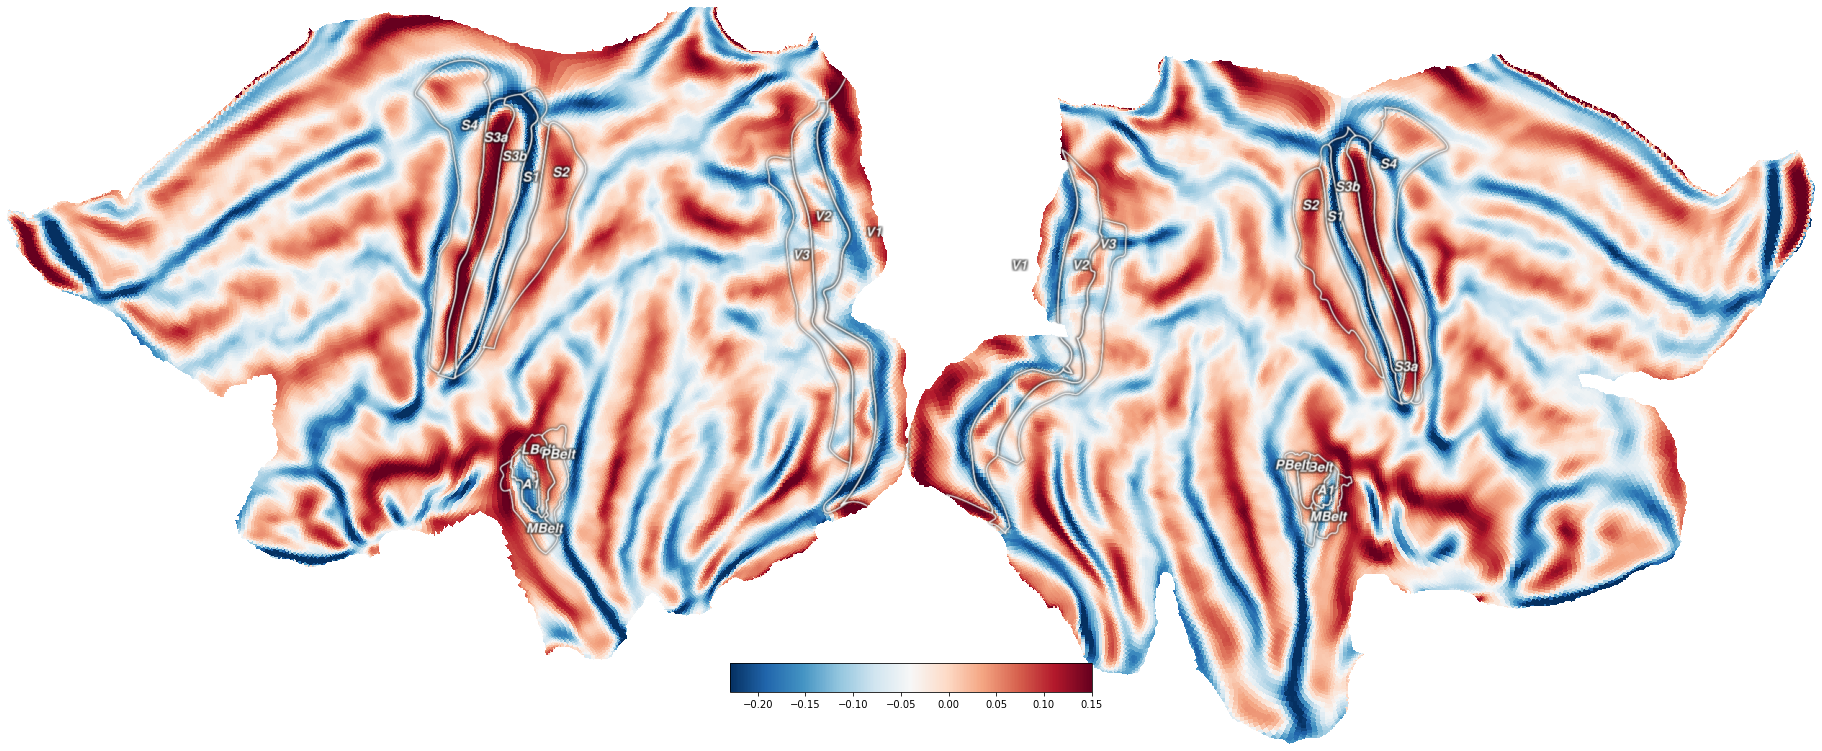

In [5]:
curv_vertices = cortex.db.get_surfinfo(subject='hcp_999999', type='curvature')
cortex.quickshow(curv_vertices);